# Import

In [1]:
# import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import time
import seaborn as sns
sns.set_theme()

# jupyter notebook full-width display
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# pandas formatting
pd.set_option('display.float_format', '{:.3f}'.format)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 200)

# Data Sources

**The Billboard 100**

https://en.wikipedia.org/wiki/Billboard_Hot_100

https://www.kaggle.com/datasets/dhruvildave/billboard-the-hot-100-songs

**1.2M Songs with Metadata (csv)**

https://www.kaggle.com/datasets/rodolfofigueroa/spotify-12m-songs

**8+ M. Spotify Tracks, Genre, Audio Features (SQL)**

https://www.kaggle.com/datasets/maltegrosse/8-m-spotify-tracks-genre-audio-features


**Spotify API**

https://developer.spotify.com/documentation/web-api/

https://developer.spotify.com/console/get-search-item

https://developer.spotify.com/console/get-audio-features-track/

https://developer.spotify.com/documentation/web-api/reference/#/operations/get-audio-features

Spotipy Library:  https://spotipy.readthedocs.io/en/master/


# Data Description and Discussion

* The Billboard 100 data did not include audio features. It was combined with audio features from the following sources:
    * 1.2M Songs with Metadata (csv format)
    * 8+ M. Spotify Tracks, Genre, Audio Features (SQLite format)
    * Spotify API data gathered via the library Spotipy
* Overall, audio features was gathered for approximately 75% of songs from the Billboard 100.
    * Some songs were excluded based on data repetition issues
        * Typically this was only hard to find songs with very similar names
        * For example searching for 'Metallica The Unforgiven' and 'Metallica The Unforgiven Part 2' yielded the same Spotify id
            * It was determined that excluding these songs was less error-prone than manually fixing the issues
            * Alternatively, we could have kept 1 song. In this case, there is up to a 50% chance that the song is mislabelled, so this option appeared less favourable than dropping both repeat instances.
* A Quality Assurance (QA) check was performed on the final dataset.
    * Audio features from 100 songs were gathered from the Spotify API and compared to the datasets listed above.
    * There were 3 non-trivial issues noted in 2 of the 100 songs:
        * Madonna Live To Tell
            * A significant increase in loudness (~7 dB)
            * Appoximately 1 second different in length
            * All other audio features consistent between data sources
            * Both of these changes appear to result from remastering and re-uploading the track
                * https://artists.spotify.com/help/article/re-uploading-music
        * Lil Wayne Let It All Work Out
            * The key signature was not consistent between the 2 sources
            * The newer source (the API request from Sept 11, 2022) was correct (B major)
            * The SQL database was also different
            * My supposition is that these errors are due to the characteristics of the song:
                * atonal (most notably the sining)
                * detuned (bass pitch automation, and low-fi detuning effects)
    * Overall, there is a large degree of consistency between datasets. Furthermore, inconsistencies are all explainable with reasonable suppositions.

### Spotify API Audio Feature Descriptions
from: https://developer.spotify.com/documentation/web-api/reference/#/operations/get-several-audio-features

##### acousticness
number
\<float>

A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.

    >= 0
    <= 1

##### analysis_url
string

A URL to access the full audio analysis of this track. An access token is required to access this data.

##### danceability
number
\<float>

Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.

##### duration_ms
integer

The duration of the track in milliseconds.

##### energy
number
\<float>

Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.

##### id
string

The Spotify ID for the track.

##### instrumentalness
number
\<float>

Predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.

##### key
integer
The key the track is in. Integers map to pitches using standard Pitch Class notation. E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1.

    >= -1
    <= 11

##### liveness
number
\<float>

Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.

##### loudness
number
\<float>

The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typically range between -60 and 0 db.

##### mode
integer

Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.

##### speechiness
number
\<float>

Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.

##### tempo
number
\<float>

The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.

##### time_signature
integer

An estimated time signature. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure). The time signature ranges from 3 to 7 indicating time signatures of "3/4", to "7/4".

    >= 3
    <= 7

##### track_href
string

A link to the Web API endpoint providing full details of the track.

##### type
string

The object type.

Allowed value:
"audio_features"

##### uri
string

The Spotify URI for the track.

##### valence
number
\<float>

A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).

    >= 0
    <= 1

# Import Data
from: Kevin 820 Data Optimisation.ipynb

In [2]:
# all songs with audio features (combined from 3 sources)
df_10M = pd.read_parquet('df_10M.parquet')

# all Billboard 100 lists, audio features included where possible
df_B100 = pd.read_parquet('df_B100.parquet')

# all unique songs from the Billboard 100 lists, audio features included where possible
df_B100_songs = pd.read_parquet('df_B100_songs.parquet')

# all unique songs from the Billboard 100 lists, only songs with audio features included
df_B100_songs_AF = df_B100_songs.dropna().copy().reset_index(drop=True)

# Data Description

In [3]:
# sizes of the datasets
df_10M.shape, df_B100.shape, df_B100_songs.shape

((9595992, 18), (329930, 22), (29681, 18))

In [4]:
# are any keys unknown (key == -1)
sorted(df_B100_songs_AF['key'].unique()), sorted(df_10M['key'].unique())
# no

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11])

In [5]:
# data types
pd.concat(
    [df_10M.dtypes, df_B100.dtypes, df_B100_songs.dtypes], 
    keys=['df_10M.dtypes', 'df_B100.dtypes', 'df_B100_songs.dtypes'],
    axis=1
)

,df_10M.dtypes,df_B100.dtypes,df_B100_songs.dtypes
id,object,object,object
song,object,object,object
artist,object,object,object
genre,object,object,object
release_date,datetime64[ns],NaN,datetime64[ns]
acousticness,float32,float32,float32
danceability,float32,float32,float32
duration_ms,Int64,Int64,Int64
energy,float32,float32,float32
instrumentalness,float32,float32,float32


In [6]:
# Date Range for Billboard Hot 100

df_B100.date.min(), df_B100.date.max()

(Timestamp('1958-08-04 00:00:00'), Timestamp('2021-11-06 00:00:00'))

In [7]:
df_B100[['rank', 'last-week', 'peak-rank', 'weeks-on-board']].describe().loc['mean':'max'].T

,mean,std,min,25%,50%,75%,max
rank,50.502,28.866,1.000,26.000,51.000,76.000,100.000
last-week,47.593,28.055,1.000,23.000,47.000,72.000,100.000
peak-rank,40.973,29.348,1.000,13.000,38.000,65.000,100.000
weeks-on-board,9.162,7.619,1.000,4.000,7.000,13.000,90.000


In [8]:
df_10M.describe().loc['mean':'max'].T

,mean,std,min,25%,50%,75%,max
acousticness,0.421,0.374,0.000,0.034,0.336,0.817,0.996
danceability,0.528,0.190,0.000,0.396,0.545,0.676,1.000
duration_ms,238209.591,159341.591,0.000,169600.000,216933.000,275080.000,19672058.000
energy,0.545,0.282,0.000,0.310,0.567,0.789,1.000
instrumentalness,0.258,0.374,0.000,0.000,0.002,0.645,1.000
key,5.237,3.542,0.000,2.000,5.000,8.000,11.000
liveness,0.210,0.180,0.000,0.096,0.129,0.262,1.000
loudness,-10.967,6.318,-60.000,-13.675,-9.196,-6.398,7.234
mode,0.661,0.473,0.000,0.000,1.000,1.000,1.000
speechiness,0.098,0.135,0.000,0.036,0.047,0.082,0.974


In [9]:
df_B100.describe().loc['mean':'max'].T

,mean,std,min,25%,50%,75%,max
rank,50.502,28.866,1.000,26.000,51.000,76.000,100.000
last-week,47.593,28.055,1.000,23.000,47.000,72.000,100.000
peak-rank,40.973,29.348,1.000,13.000,38.000,65.000,100.000
weeks-on-board,9.162,7.619,1.000,4.000,7.000,13.000,90.000
acousticness,0.278,0.275,0.000,0.041,0.178,0.468,0.995
danceability,0.603,0.149,0.000,0.507,0.611,0.708,0.988
duration_ms,226879.648,66552.146,30213.000,183360.000,221306.000,258399.000,1561133.000
energy,0.625,0.199,0.007,0.479,0.643,0.786,0.999
instrumentalness,0.034,0.139,0.000,0.000,0.000,0.001,0.985
key,5.218,3.564,0.000,2.000,5.000,8.000,11.000


In [10]:
df_B100_songs.describe().loc['mean':'max'].T

,mean,std,min,25%,50%,75%,max
acousticness,0.316,0.290,0.000,0.052,0.224,0.556,0.995
danceability,0.590,0.152,0.000,0.491,0.598,0.697,0.988
duration_ms,217638.340,68403.261,30213.000,169533.000,210426.000,251333.000,1561133.000
energy,0.611,0.203,0.007,0.463,0.624,0.775,0.999
instrumentalness,0.039,0.151,0.000,0.000,0.000,0.001,0.985
key,5.196,3.556,0.000,2.000,5.000,8.000,11.000
liveness,0.197,0.168,0.012,0.091,0.132,0.255,0.999
loudness,-8.927,3.622,-30.346,-11.314,-8.554,-6.111,2.291
mode,0.741,0.438,0.000,0.000,1.000,1.000,1.000
speechiness,0.067,0.076,0.000,0.032,0.040,0.061,0.951


**Proportion of Songs With Audio Feature Data:**

~75% of songs on the Billboard list are available on Spotify, and weren't removed for data errors

In [11]:
# All Billboard 100 lists
# number not null, total, proportion not null
(
    df_B100[df_B100.id.notnull()].shape[0], 
    df_B100.shape[0], 
    df_B100[df_B100.id.notnull()].shape[0] / df_B100.shape[0]
)

(253254, 329930, 0.7675991877064832)

In [12]:
# All songs from Billboard 100 lists
# number not null, total, proportion not null
(
    df_B100_songs[df_B100_songs.id.notnull()].shape[0], 
    df_B100_songs.shape[0], 
    df_B100_songs[df_B100_songs.id.notnull()].shape[0] / df_B100_songs.shape[0]
)

(22189, 29681, 0.7475826286176341)

In [13]:
df_B100_songs_AF.columns

Index(['id', 'song', 'artist', 'genre', 'release_date', 'acousticness',
       'danceability', 'duration_ms', 'energy', 'instrumentalness', 'key',
       'liveness', 'loudness', 'mode', 'speechiness', 'tempo',
       'time_signature', 'valence'],
      dtype='object')

# Exploratory Data Analysis

### Histograms

In [55]:
# main features
features = ['acousticness', 'danceability', 'energy', 'instrumentalness', 
            'liveness', 'loudness', 'speechiness', 'tempo', 'valence']

def compare_histograms(feature, bins=50, logy=False, figsize=(16, 6)):
    
    plt.figure(figsize=figsize)
    
    # bins don't line up unless you do this
    if feature == 'loudness':
        xmin, xmax = -16, 0
        plt.xlim(xmin, xmax)  # reasonable range for loudness in music
        bins_plot = [(x/(bins+1))*(xmax-xmin)+xmin for x in range(bins+2)] 
    elif feature == 'tempo':
        xmin, xmax = 40, 200
        plt.xlim(xmin, xmax)  # reasonable range for tempo in music
        bins_plot = [(x/(bins+1))*(xmax-xmin)+xmin for x in range(bins+2)] 
    else:
        xmin, xmax = 0, 1
        plt.xlim(xmin, xmax)  # most audio features vary between 0 and 1
        bins_plot = [(x/(bins+1))*(xmax-xmin)+xmin for x in range(bins+2)]         
        # NOTE: mode is an int, either 0 or 1 (minor/major), 
        # but the average shows how commonly a song is in either mode
    
    # plots
    plt.hist(df_B100_songs_AF[feature], bins_plot, alpha=0.5, label='Hot 100 Songs', density=True)
    plt.hist(df_10M[feature], bins_plot, alpha=0.5, label='All Songs', density=True)
    
    title = f'{feature.title()} Histogram'
    plt.title(title)
    plt.xlabel(feature.title())
    plt.legend(loc='upper right')
    if logy:
        plt.yscale('log')
        plt.ylabel('Log Relative Frequency')
    else:
        plt.ylabel('Relative Frequency')
    
    # save the image
    plt.savefig(f'figures/histograms/{title}.png', facecolor='w', dpi=150, bbox_inches='tight')
    
    plt.show()


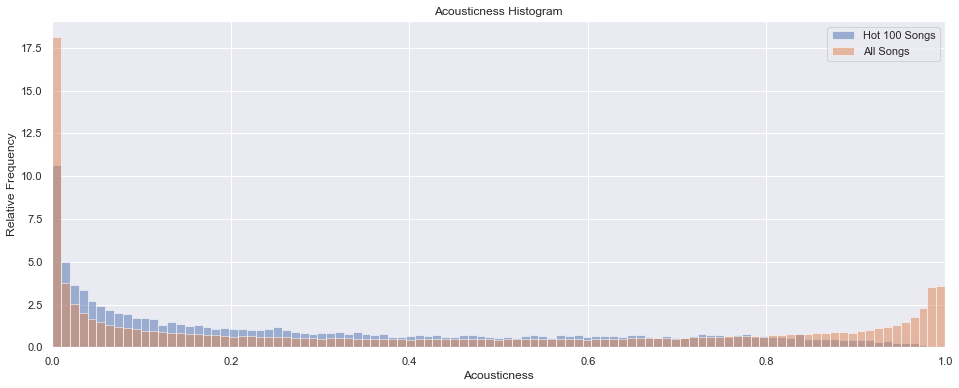

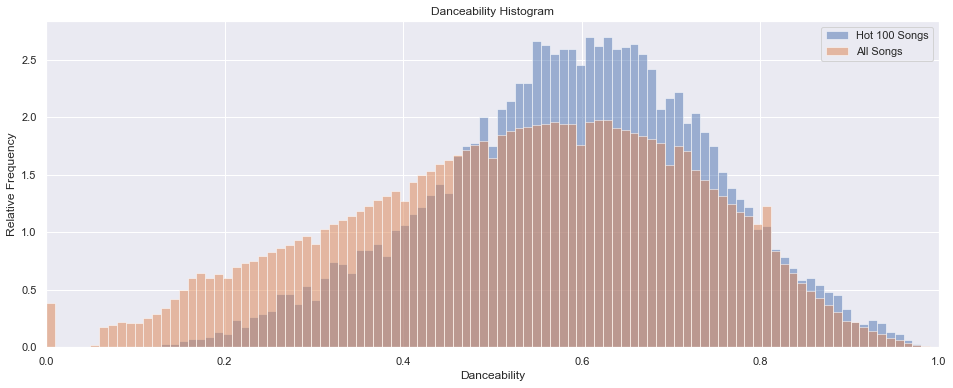

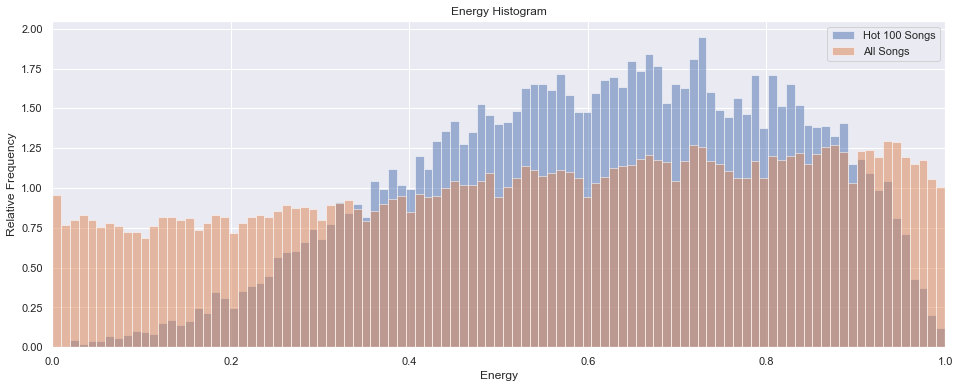

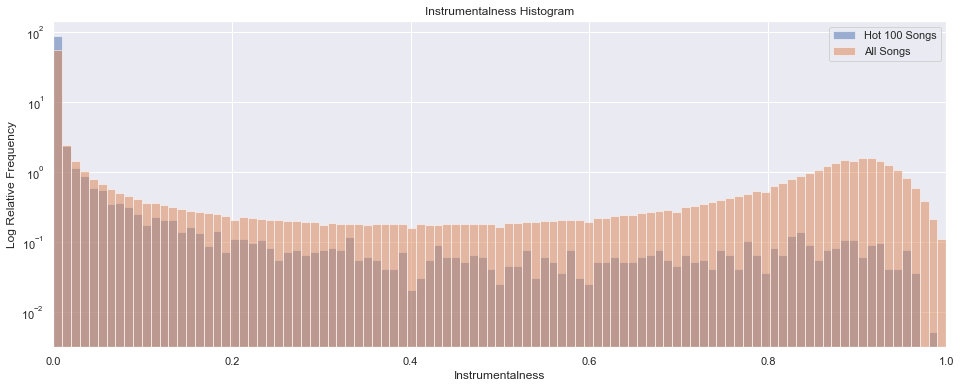

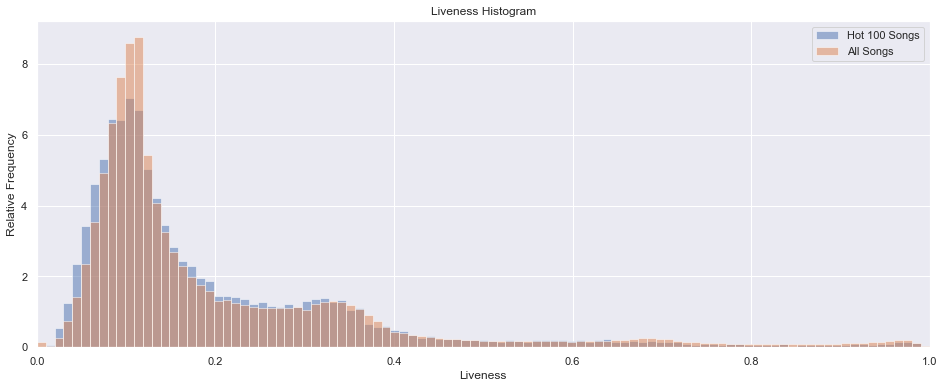

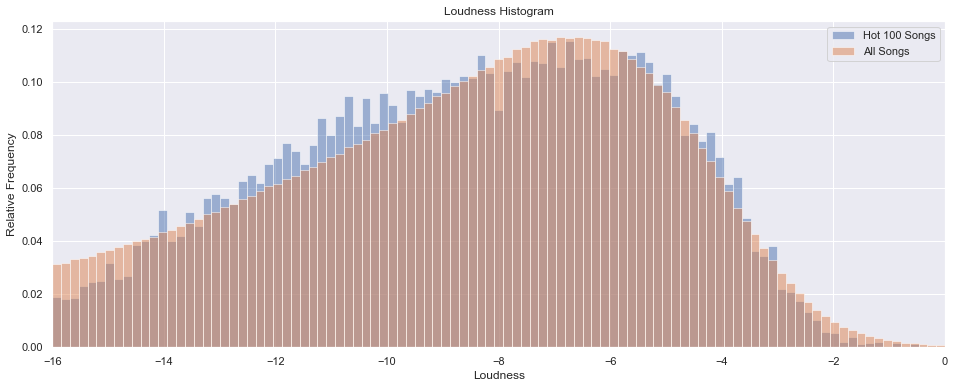

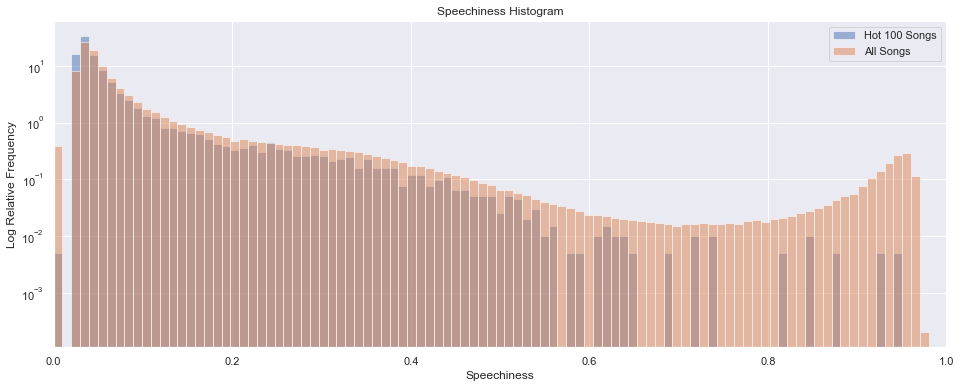

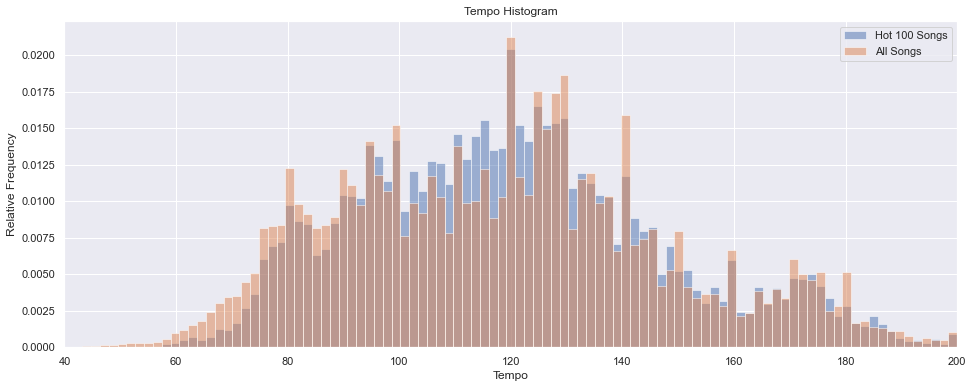

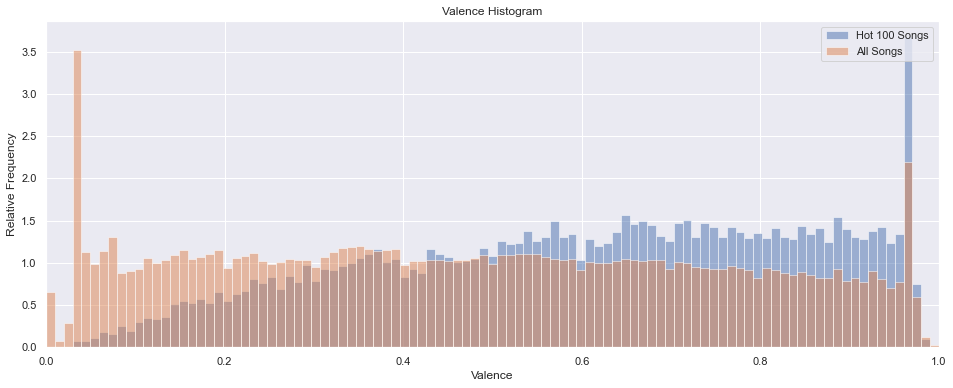

In [56]:
# Histograms of Features
for feature in features:
    compare_histograms(feature, 100, logy=(feature in ['duration_ms', 'instrumentalness', 'speechiness']))

In [62]:
# features requiring specific bin sizes
other_features = ['key', 'mode', 'time_signature']

# Histograms of Features with Specific Bin Sizes
other_bins = {'key': 12, 'mode': 2, 'time_signature': 5}

def compare_histograms_discrete(feature, bins=50, logy=False, figsize=(16, 6)):

    fig, ax = plt.subplots(figsize=figsize)
    
    # use range(bins+1) to offset tick labels and line up with appropriate labels
    plt.hist(df_B100_songs_AF[feature], [x for x in range(bins+1)], alpha=0.5, label='Hot 100 Songs', density=True, align='left')
    plt.hist(df_10M[feature], [x for x in range(bins+1)], alpha=0.5, label='All Songs', density=True, align='left')

    title = f'{feature.title()} Histogram'
    plt.title(title)
    plt.xlabel(feature.title())
    plt.legend(loc='upper right')
    if logy:
        plt.yscale('log')
        plt.ylabel('Log Relative Frequency')
    else:
        plt.ylabel('Relative Frequency')
    
    ax.set(xticks=[x for x in range(bins)])
    
    # save the image
    plt.savefig(f'figures/histograms/{title}.png', facecolor='w', dpi=150, bbox_inches='tight')
    
    plt.show()


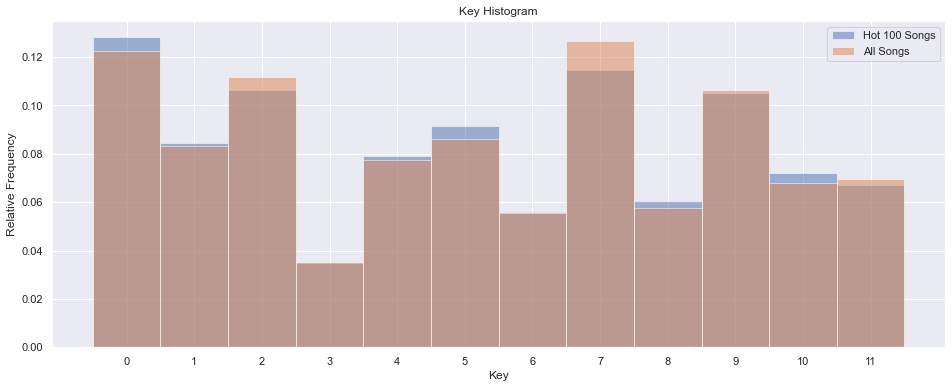

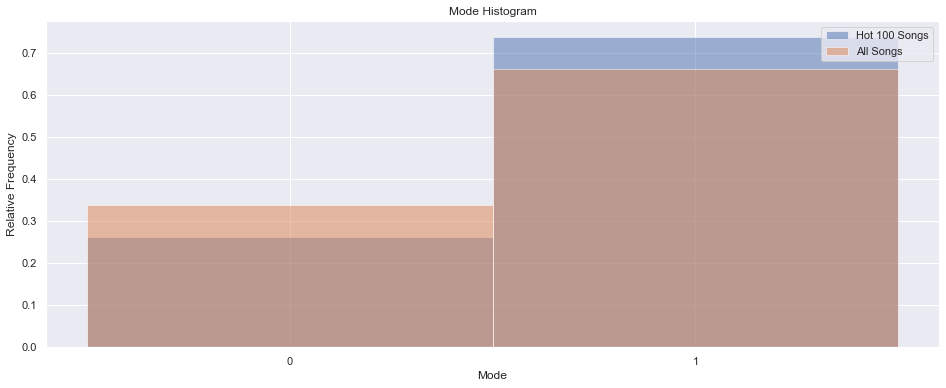

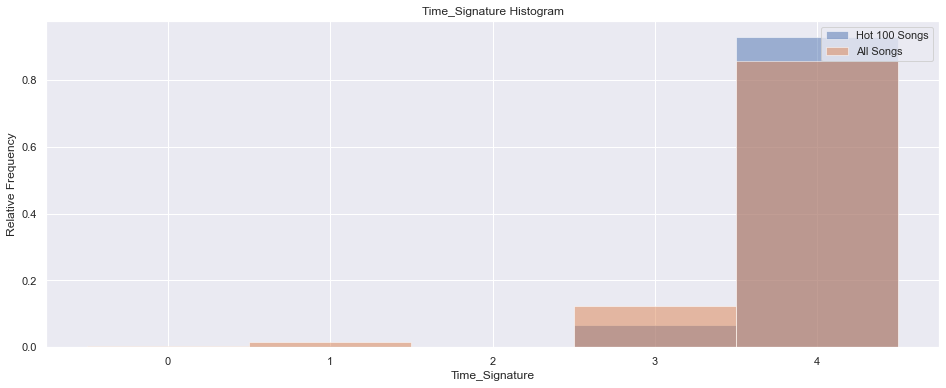

In [63]:
# Histograms of Features with Specific Bin Sizes

# Histograms of Features
for feature in other_features:
    compare_histograms_discrete(feature, other_bins[feature])

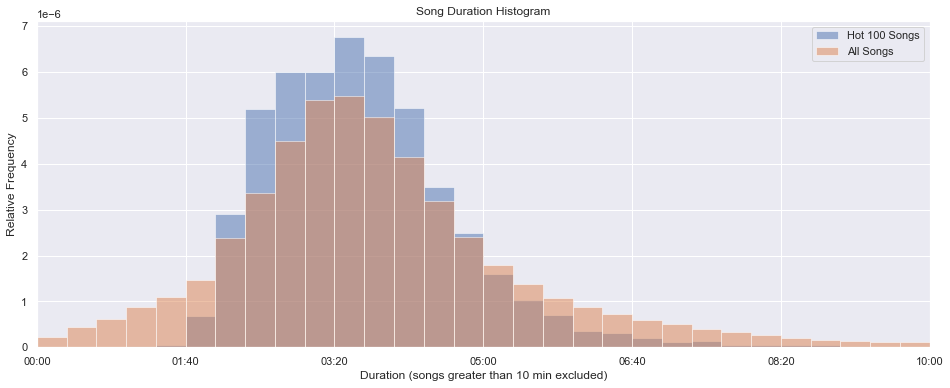

In [60]:
# duration_ms needs to share the x-axis

fig, ax = plt.subplots(figsize=(16, 6))

bins = 1000
maxx = df_10M['duration_ms'].max()
maxx = round(maxx, ndigits=-7)
increment = maxx / bins  # need to do this first or get integer wrap around error
bins = [x for x in range(bins) * increment] 

plt.hist(df_B100_songs_AF['duration_ms'], bins, alpha=0.5, label='Hot 100 Songs', density=True)
plt.hist(df_10M['duration_ms'], bins, alpha=0.5, label='All Songs', density=True)

title = 'Song Duration Histogram'
plt.title(title)
plt.xlabel('Duration (songs greater than 10 min excluded)')
plt.legend(loc='upper right')
plt.ylabel('Relative Frequency')
ax.set_xlim((0, 600000))

# https://stackoverflow.com/questions/40395227/minute-and-second-format-for-x-label-of-matplotlib
formatter = mpl.ticker.FuncFormatter(lambda ms, x: time.strftime('%M:%S', time.gmtime(ms // 1000)))
ax.xaxis.set_major_formatter(formatter)

# save the image
plt.savefig(f'figures/histograms/{title}.png', facecolor='w', dpi=150, bbox_inches='tight')

plt.show(feature.title())

### Time Series

In [54]:
# audio features
main_features = [
    'acousticness', 'danceability', 'energy', 'instrumentalness', 
    'liveness', 'loudness', 'mode', 'speechiness', 'tempo', 'valence'
]

# date filter: this affects all time series plotting functions below
# date_filter = 'release_date >= 1958'  # original filter, revised based on later section (see note below)
date_filter = '1958 <= release_date < 2021'

##### NOTE:
* The revised date_filter is based on data quality past 2020
* this is based on analysis later in this notebook: Time Series Counts - Preferred Date Filter
    * this analysis is later in the notebook because it was conducted to explain abberations in time series plots

In [55]:
def plot_attribute_history(feature, dataframe=df_B100_songs_AF, title=None, colour=0):
    """
    Uses songs df_B100_songs_AF by default
    Plots Billboard Hot 100 audio features over time
    """
    # drop values before billboard 100 (lower quality data)
    temp_df = dataframe.query(date_filter)

    plt.figure(figsize=(16, 6))
    ax = sns.lineplot(
        x=temp_df.release_date.dt.year, 
        y=temp_df[feature],
        color=sns.color_palette()[colour], 
        errorbar=('pi', 50)  # middle 50% or IQR
    )
    
    if title:
        title=title
    else:
        title=f'{feature.capitalize()} History in the Billboard Hot 100, Aggregated By Release Year, Interquartile Range Highlighted'
    
    if feature == 'loudness':
        plt.ylim(-16, 0)  # reasonable range for loudness in music
    elif feature == 'tempo':
        plt.ylim(40, 200)  # reasonable range for tempo in music
    else:
        plt.ylim(0, 1)  # most audio features vary between 0 and 1
        # NOTE: mode is an int, either 0 or 1 (minor/major), 
        # but the average shows how commonly a song is in either mode
    
    plt.title(title, fontsize=13)
    plt.xlabel('Year of Release')
    plt.ylabel(feature.capitalize().replace('_', ' '))
    
    # save the image
    plt.savefig(f'figures/timeseries/{title}.png', facecolor='w', dpi=150, bbox_inches='tight')
    
    plt.show()

# # test
# plot_attribute_history('acousticness')

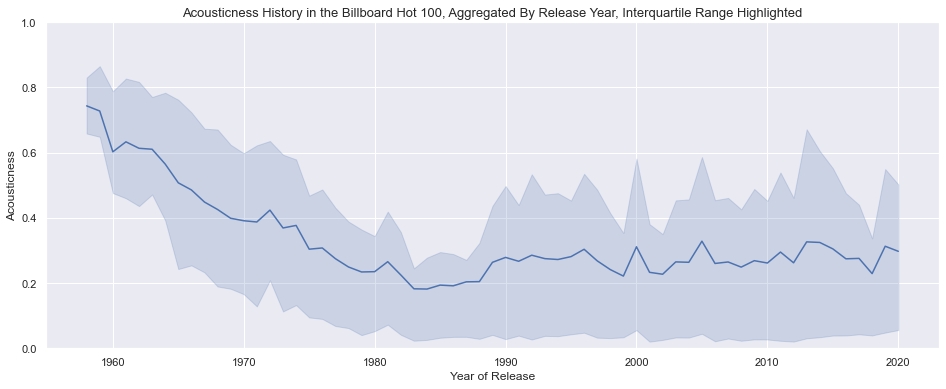

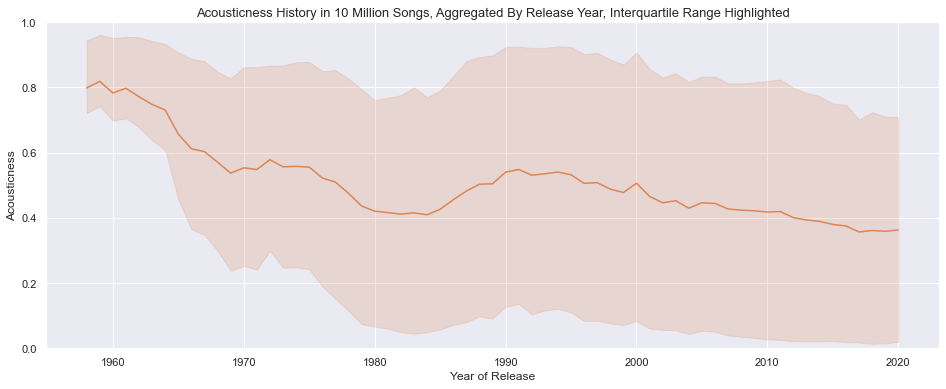

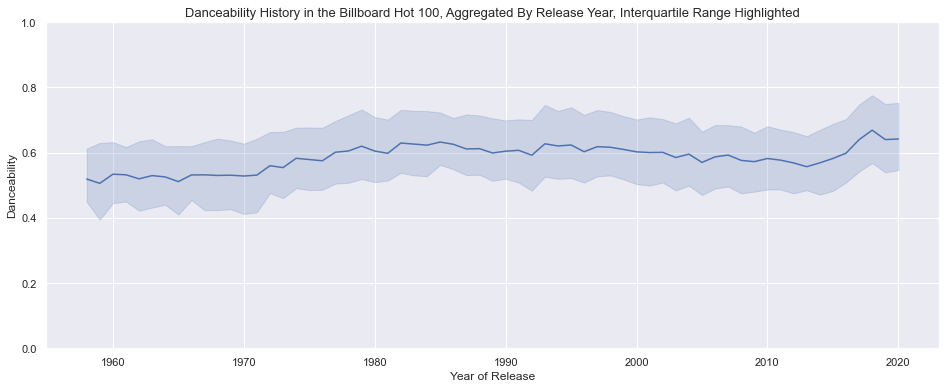

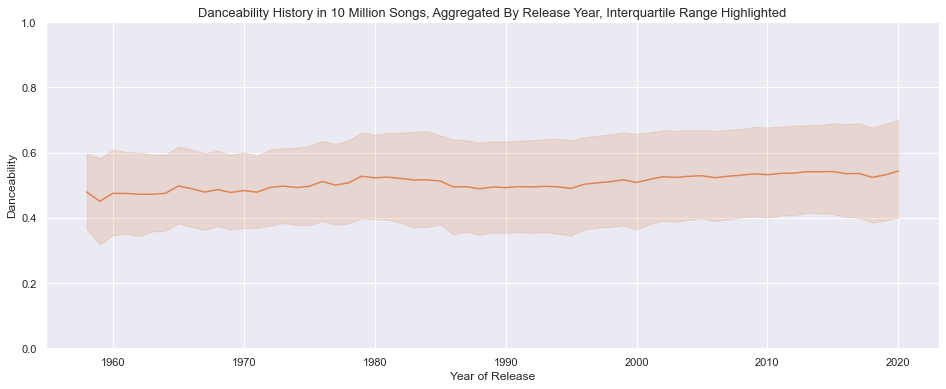

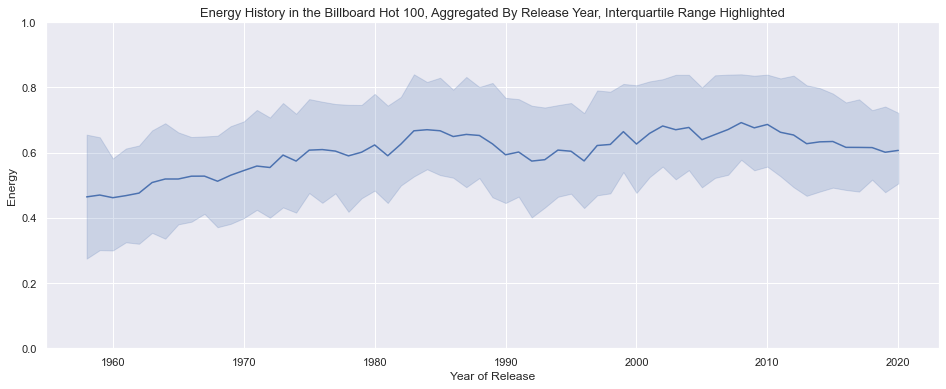

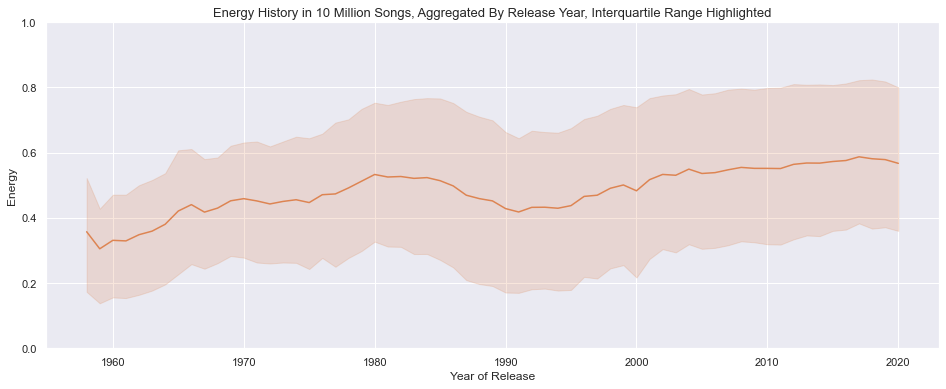

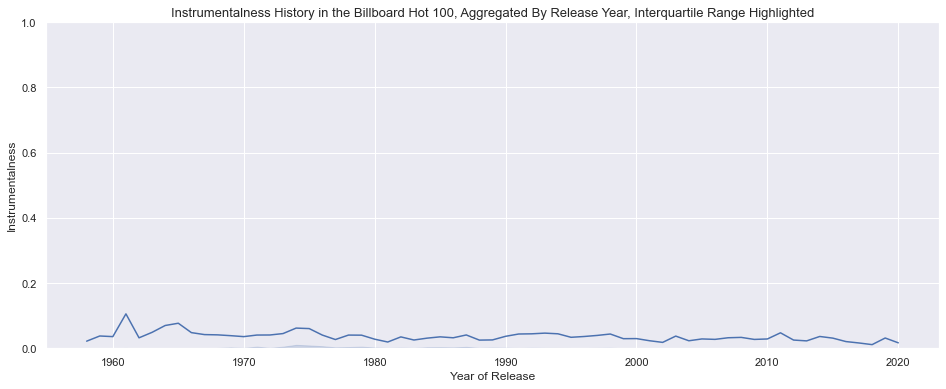

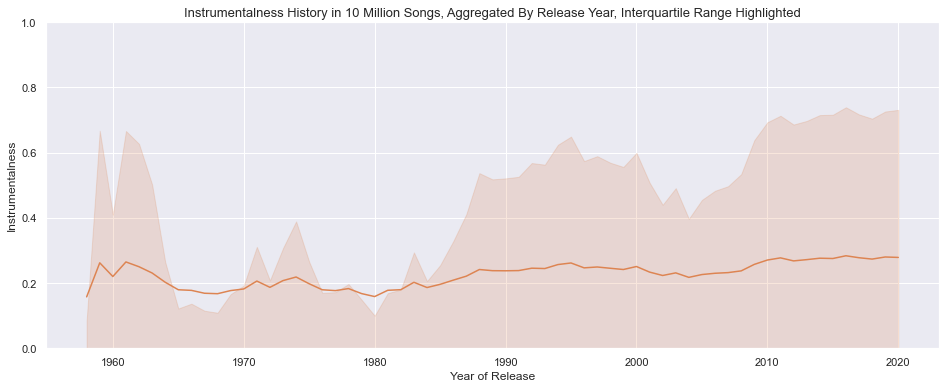

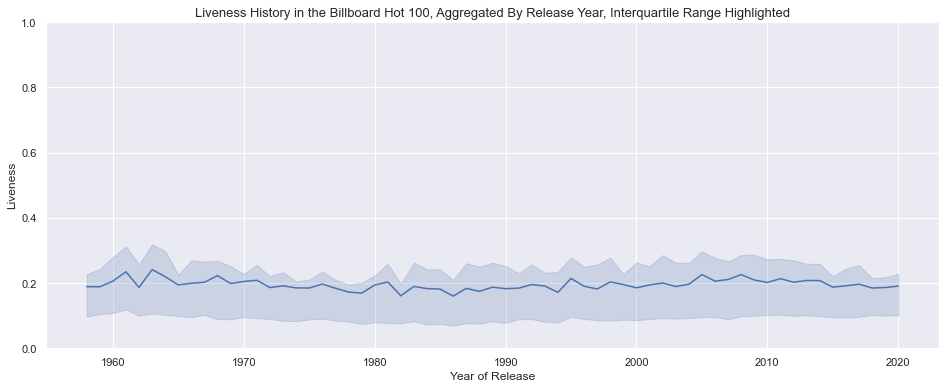

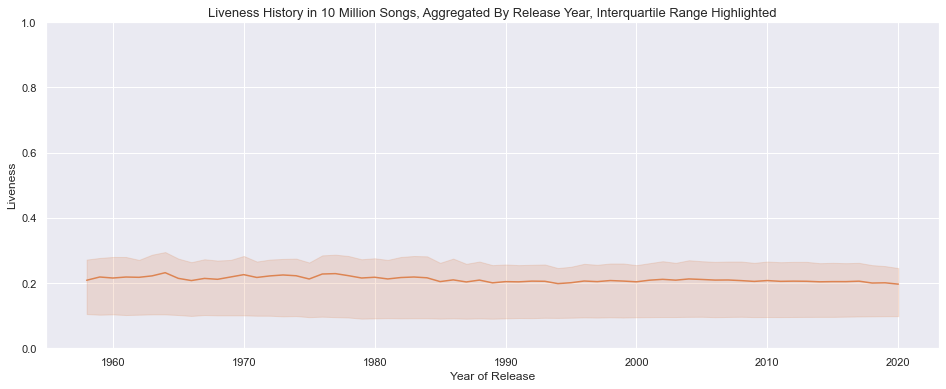

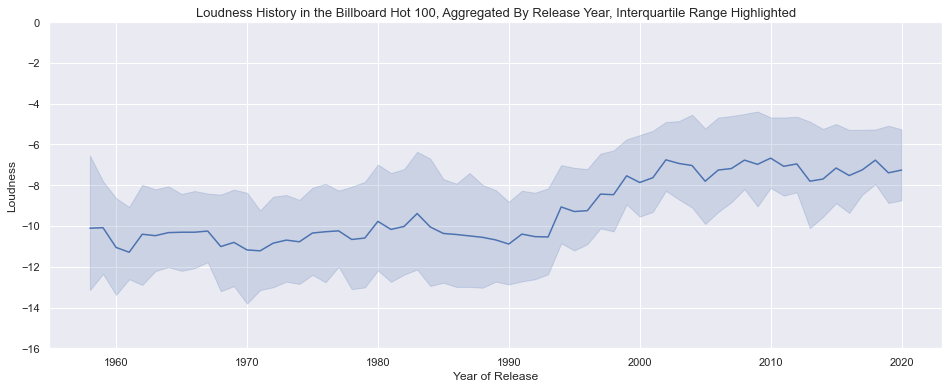

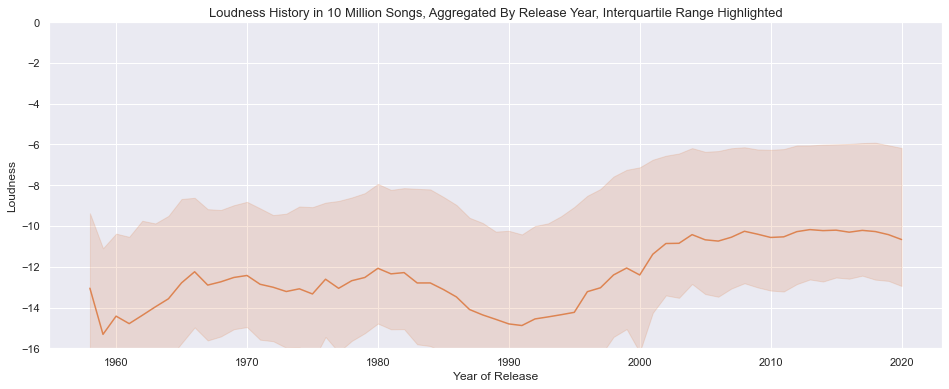

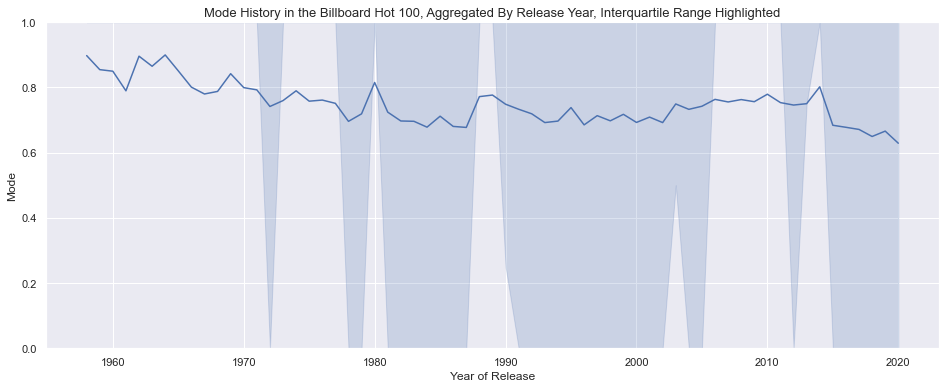

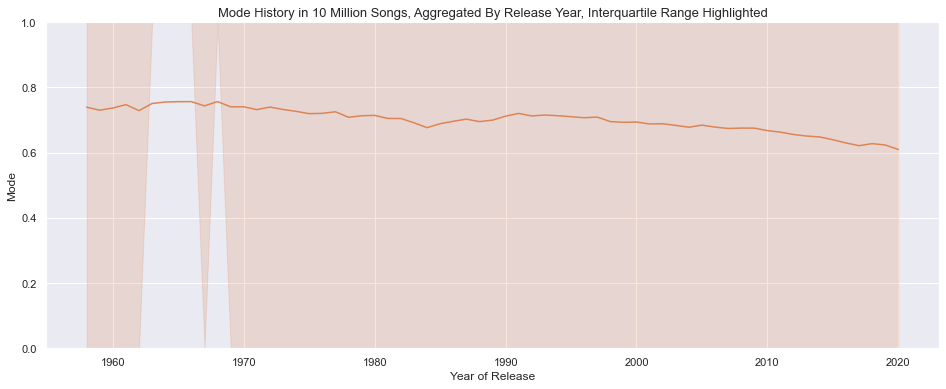

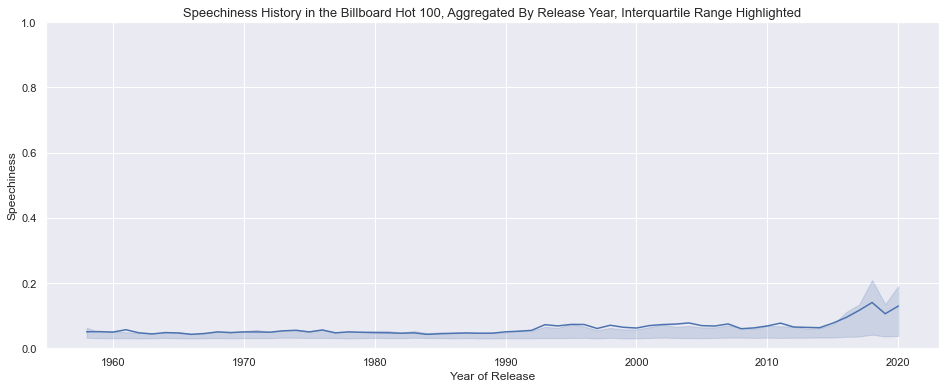

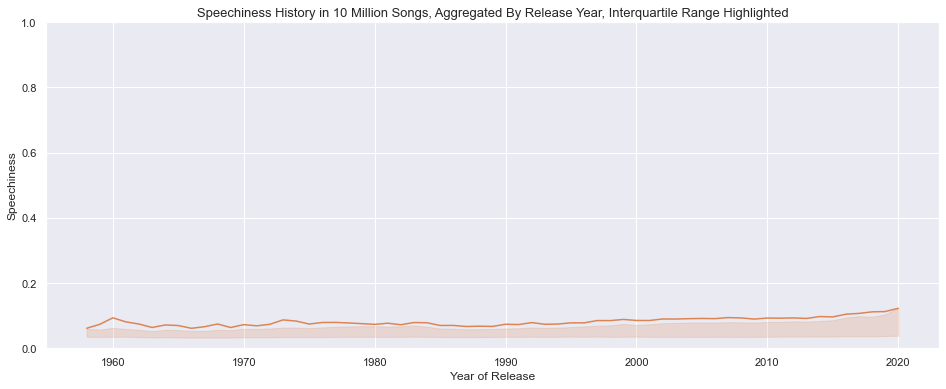

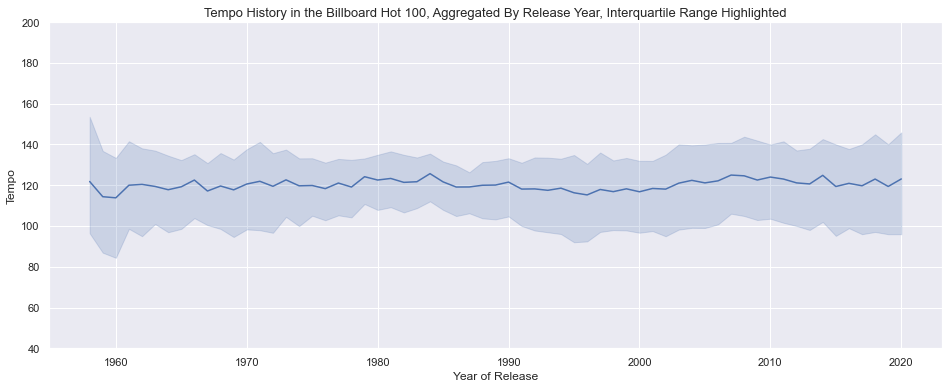

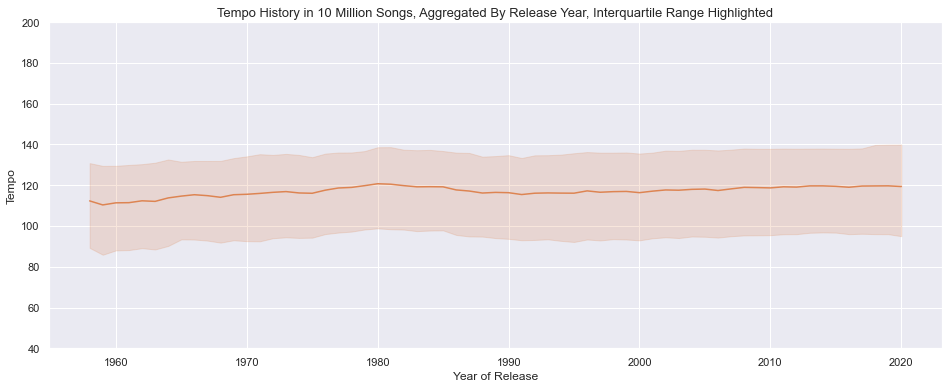

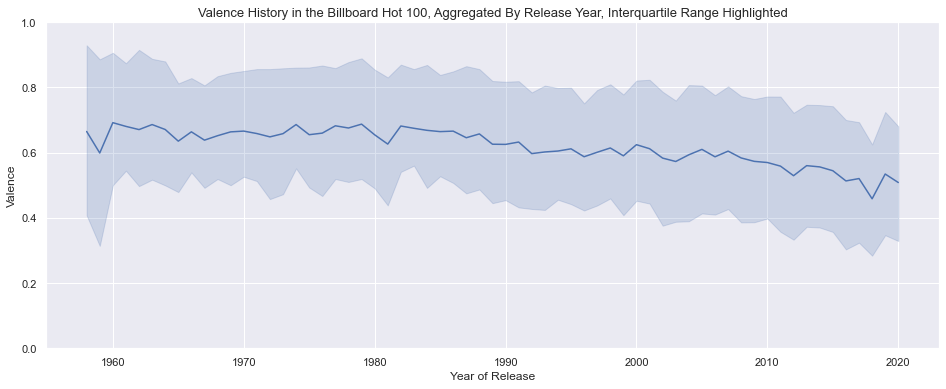

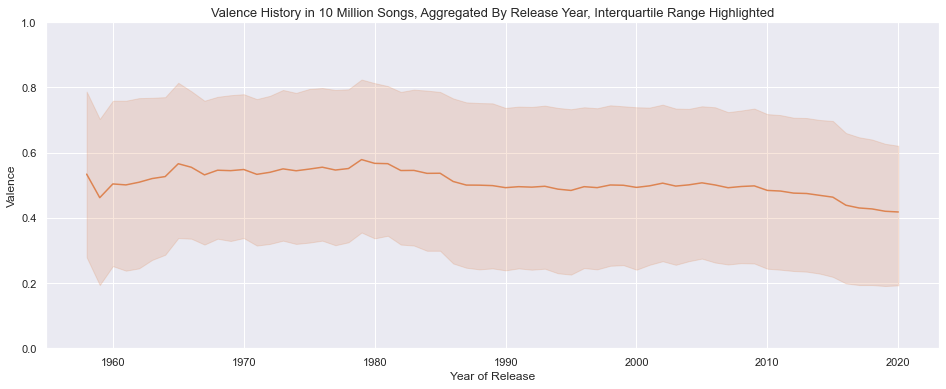

Wall time: 1min 18s


In [57]:
%%time
# plot features for Billboard Hot 100 and All Songs
for feature in main_features:
    # first plot the Billboard Hot 100
    plot_attribute_history(feature)
    # then plot the same feature from the large dataset
    title = f'{feature.capitalize()} History in 10 Million Songs, Aggregated By Release Year, Interquartile Range Highlighted'
    plot_attribute_history(feature, dataframe=df_10M, title=title, colour=1)

In [58]:
# audio features
other_features = [
    'key', 'time_signature', # integers don't make sense in timeseries lineplot (maybe heatplot?)
    'duration_ms',  # irregular feature, plotting requires some extra work
]

def plot_duration(feature='duration_ms', dataframe=df_B100_songs_AF, title=None, colour=0):
    """
    Uses songs df_B100_songs_AF 
    Plots Billboard Hot 100 audio features over time
    """
    # drop values before billboard 100 (lower quality data)
    temp_df = dataframe.query(date_filter)
    
    plt.figure(figsize=(16, 6))
    ax = sns.lineplot(
        x=temp_df.release_date.dt.year, 
        y=temp_df[feature],
        color=sns.color_palette()[colour], 
        errorbar=('pi', 50)  # middle 50% or IQR
    )
    
    formatter = mpl.ticker.FuncFormatter(lambda ms, x: time.strftime('%M:%S', time.gmtime(ms // 1000)))
    ax.yaxis.set_major_formatter(formatter)
    plt.ylabel('Duration (minutes : seconds)')
        
    if title:
        title=title
    else:
        title=f'Song Duration History in the Billboard Hot 100, Aggregated By Release Year, Interquartile Range Highlighted'
    
    plt.ylim(120000, 300000)  # reasonable range for duration of music
    
    plt.title(title, fontsize=13)
    
    # save the image
    plt.savefig(f'figures/timeseries/{title}.png', facecolor='w', dpi=150, bbox_inches='tight')
    
    plt.show()


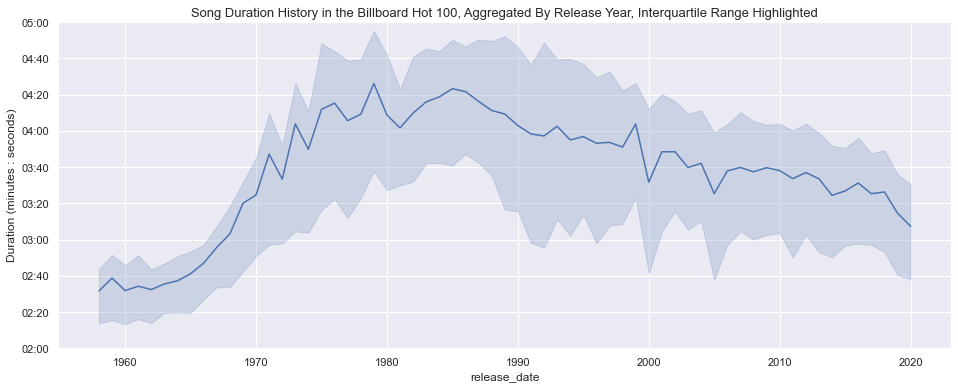

In [59]:
plot_duration(feature='duration_ms')

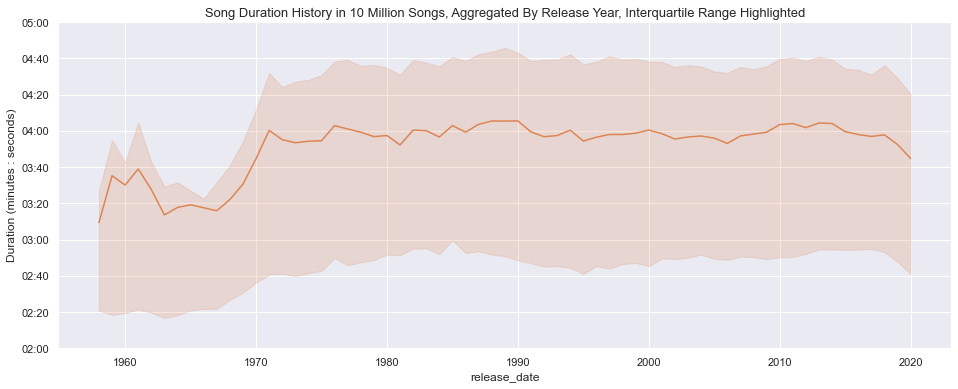

Wall time: 12.2 s


In [60]:
%%time
title = 'Song Duration History in 10 Million Songs, Aggregated By Release Year, Interquartile Range Highlighted'
plot_duration(feature='duration_ms', dataframe=df_10M, title=title, colour=1)

### Comparative Time Series

In [61]:
def plot_feature_comparison(feature):
    """
    Uses songs df_B100_songs_AF 
    Plots Billboard Hot 100 audio features over time
    """
    
    fig, ax = plt.subplots(figsize=(16, 6))
    
    df1 = df_B100_songs_AF.query(date_filter)
    ax = sns.lineplot(
        x=df1.release_date.dt.year, 
        y=df1[feature],
        color=sns.color_palette()[0], 
        errorbar=None, 
        label='Hot 100 Songs'
    )
    
    df2 = df_10M.query(date_filter)
    ax = sns.lineplot(
        x=df2.release_date.dt.year, 
        y=df2[feature],
        color=sns.color_palette()[1], 
        errorbar=None, 
        label='All Songs'
    )
    
    title=f'{feature.capitalize()} History Comparing the Billboard Hot 100 with All Songs'
            
    if feature == 'loudness':
        plt.ylim(-16, 0)  # reasonable range for loudness in music
    elif feature == 'tempo':
        plt.ylim(40, 200)  # reasonable range for tempo in music
    else:
        plt.ylim(0, 1)  # most audio features vary between 0 and 1
        # NOTE: mode is an int, either 0 or 1 (minor/major), 
        # but the average shows how commonly a song is in either mode
    
    plt.title(title, fontsize=13)
    plt.xlabel('Year of Release')
    plt.ylabel(feature.capitalize().replace('_', ' '))
    plt.legend(loc='upper right')
    
    # save the image
    plt.savefig(f'figures/timeseries/{title}.png', facecolor='w', dpi=150, bbox_inches='tight')
    
    plt.show()


def plot_duration_comparison(feature='duration_ms'):
    """
    Uses songs df_B100_songs_AF 
    Plots Billboard Hot 100 audio features over time
    """
    
    fig, ax = plt.subplots(figsize=(16, 6))
    
    df1 = df_B100_songs_AF.query(date_filter)
    ax = sns.lineplot(
        x=df1.release_date.dt.year, 
        y=df1[feature],
        color=sns.color_palette()[0], 
        errorbar=None, 
        label='Hot 100 Songs'
    )
    
    df2 = df_10M.query(date_filter)
    ax = sns.lineplot(
        x=df2.release_date.dt.year, 
        y=df2[feature],
        color=sns.color_palette()[1], 
        errorbar=None, 
        label='All Songs'
    )
    
    formatter = mpl.ticker.FuncFormatter(lambda ms, x: time.strftime('%M:%S', time.gmtime(ms // 1000)))
    ax.yaxis.set_major_formatter(formatter)
    plt.ylabel('Duration (minutes : seconds)')
        
    title='Song Duration History Comparing the Billboard Hot 100 with All Songs'
    
    plt.ylim(120000, 300000)  # reasonable range for duration of music
    
    plt.title(title, fontsize=13)
    plt.xlabel('Year of Release')
    plt.legend(loc='upper right')
    
    # save the image
    plt.savefig(f'figures/timeseries/{title}.png', facecolor='w', dpi=150, bbox_inches='tight')
    
    plt.show()


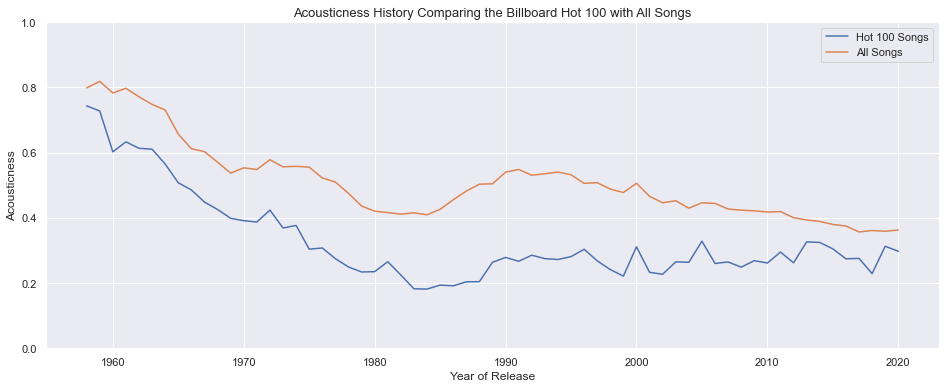

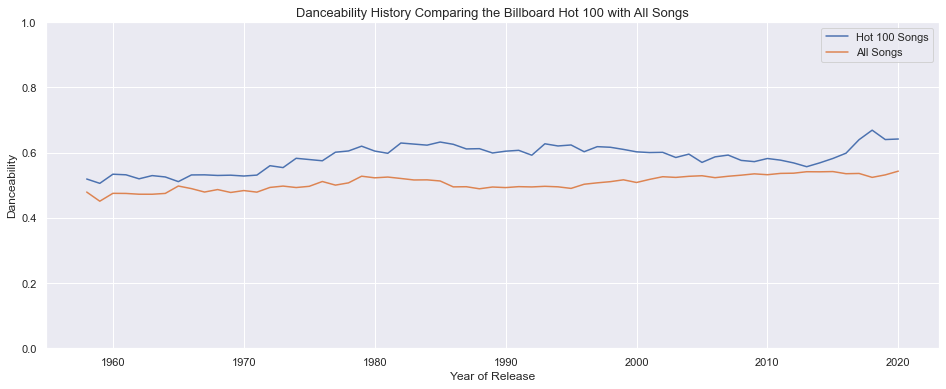

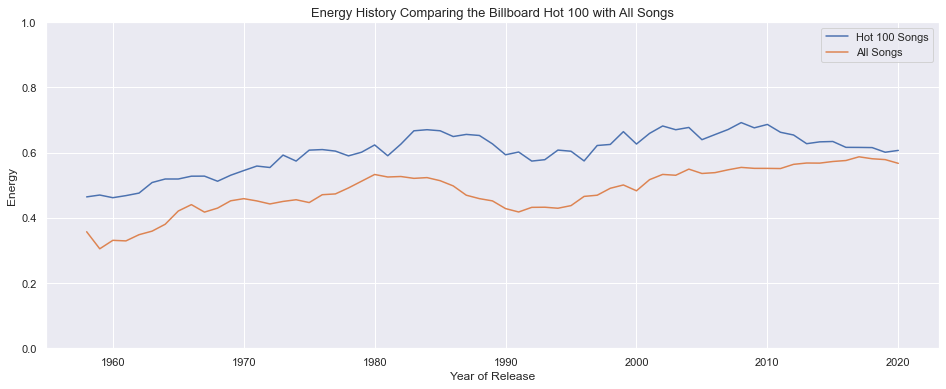

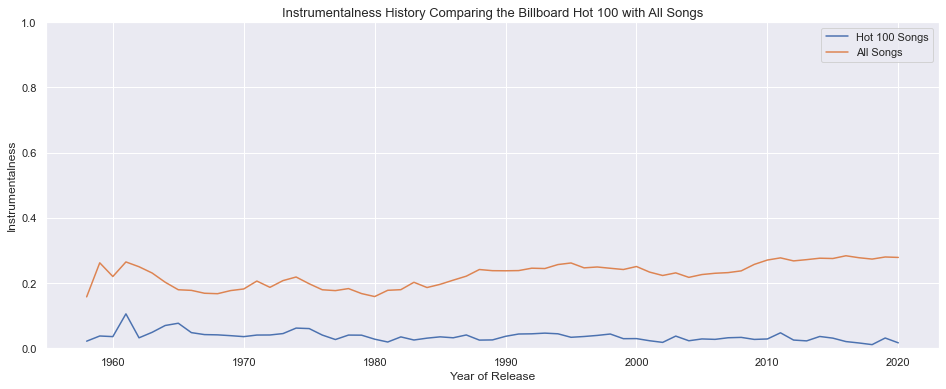

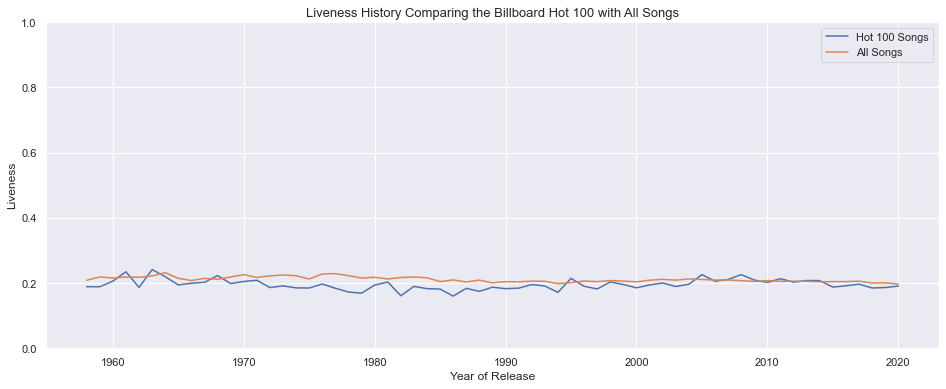

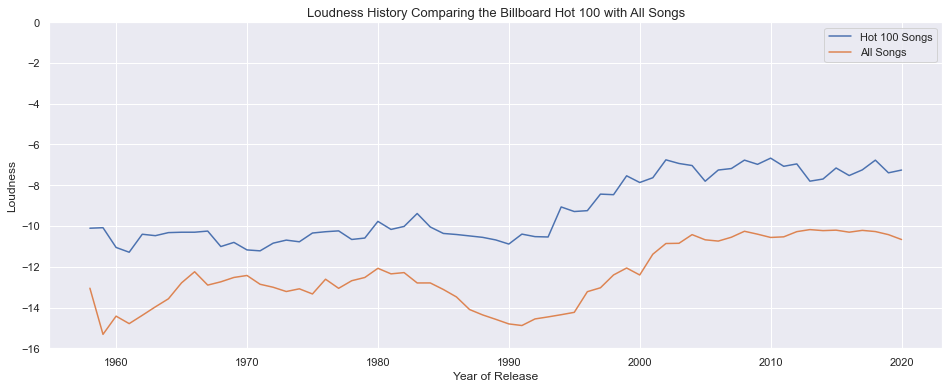

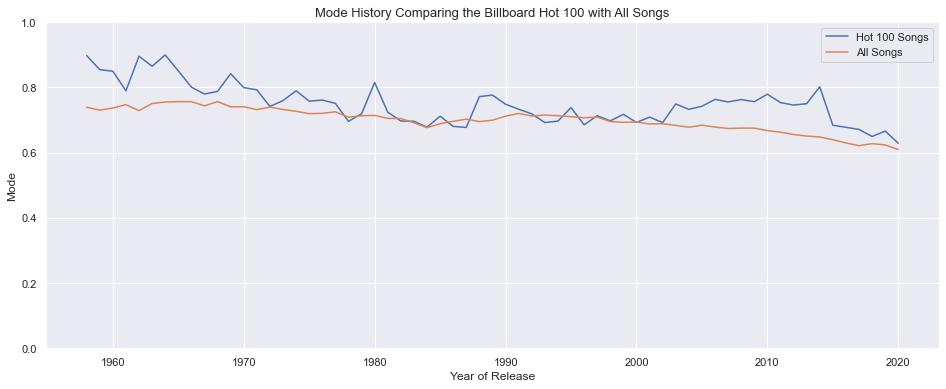

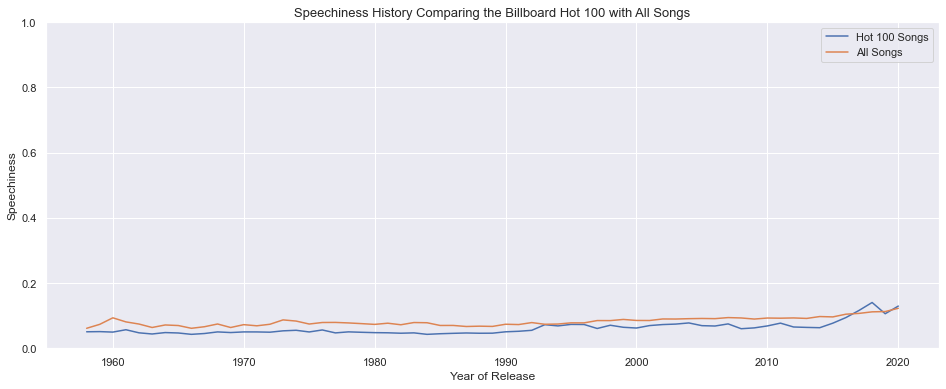

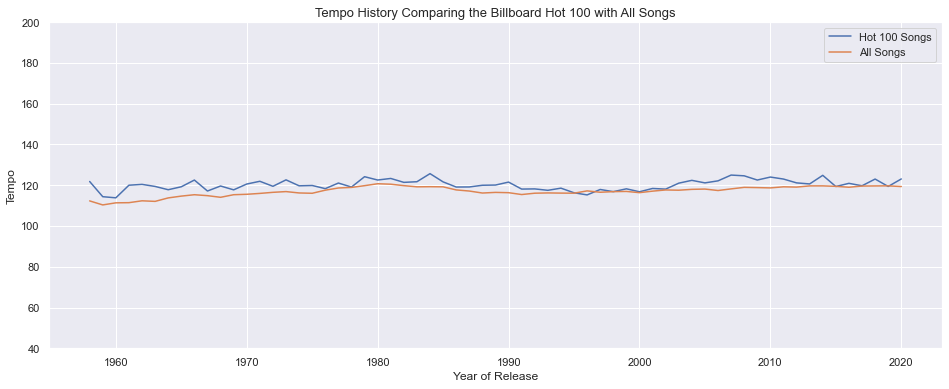

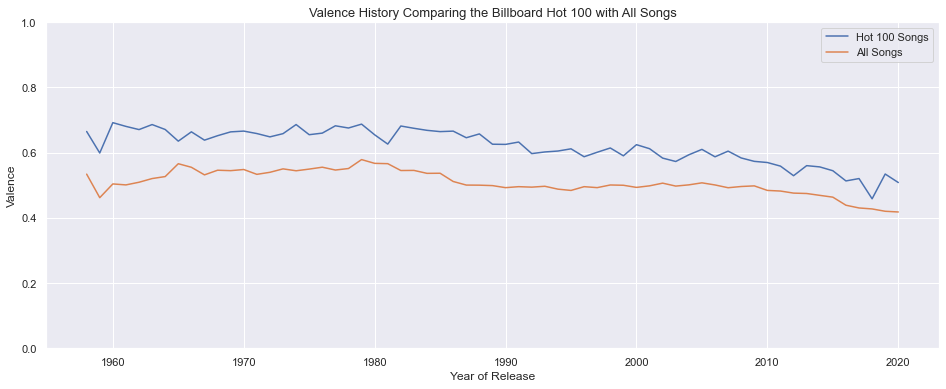

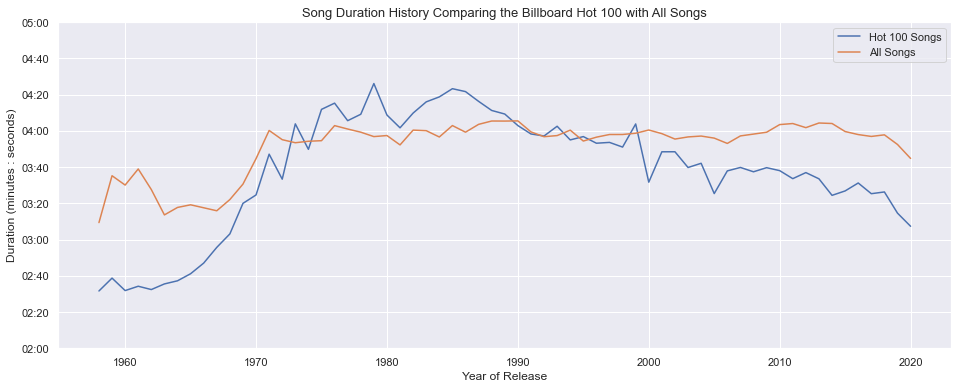

Wall time: 1min 21s


In [62]:
%%time
# audio features
main_features = [
    'acousticness', 'danceability', 'energy', 'instrumentalness', 
    'liveness', 'loudness', 'mode', 'speechiness', 'tempo', 'valence'
]

for feature in main_features:
    plot_feature_comparison(feature)
plot_duration_comparison()

### Time Series Counts - Preferred Date Filter
* data seems to deteriorate after 2020, with large movements in music trends (CORRECT)
* alternatively, this could be due to significant societal changes and preferences (NOT VERIFIABLE)
##### Let's find out!

In [30]:
df_10M.release_date.dt.year.value_counts().reset_index().sort_values('index', ascending=False).head()

,index,release_date
67,2022.000,68
27,2021.000,84478
9,2020.000,359973
11,2019.000,329738
12,2018.000,321232


In [31]:
df_B100_songs.release_date.dt.year.value_counts().reset_index().sort_values('index', ascending=False).head()

,index,release_date
63,2022.000,112
17,2021.000,419
0,2020.000,648
7,2019.000,494
8,2018.000,493


In [32]:
# find max dates for each dataset

# SQL
max_date_sql = 1644537600000
pd.to_datetime(max_date_sql, unit='ms', origin='unix')

Timestamp('2022-02-11 00:00:00')

In [36]:
# Billboard Hot 100
df_B100.sort_values('date', ascending=False).head(1)['date']

329929   2021-11-06
Name: date, dtype: datetime64[ns]

In [42]:
# CSV
pd.read_csv('D:/RYERSON/820/Datasets/Spotify 1.2M+ Songs/tracks_features.csv').sort_values('release_date', ascending=False).head(1)['release_date']

1134062    2020-12-18
Name: release_date, dtype: object

In [48]:
# Latest Release Dates by Dataset
latest_sql = pd.to_datetime('2022-02-11 00:00:00')
latest_B100 = pd.to_datetime('2021-11-06 00:00:00')
latest_csv = pd.to_datetime('2020-12-18 00:00:00')

# max date option 1 (all datasets consistent):
maxdate_1 = min(latest_sql, latest_B100, latest_csv)

# max date option 2 (all Billboard 100 songs):
maxdate_2 = min(latest_sql, latest_B100)

# options for filtering
maxdate_1, maxdate_2

(Timestamp('2020-12-18 00:00:00'), Timestamp('2021-11-06 00:00:00'))

In [51]:
# let's check the quantiy (not quality) of 2021 (with SQL, without CSV) vs 2020 (both)

df_10M.query('2021 <= release_date < 2022').shape[0], df_10M.query('2020 <= release_date < 2021').shape[0]

(84478, 359973)

In [52]:
# only 23% of the songs during 2021 vs 2020: looks like maxdate_1 is a better choice
df_10M.query('2021 <= release_date < 2022').shape[0] / df_10M.query('2020 <= release_date < 2021').shape[0]

0.2346787120145122

##### CONCLUSION: We should only include data up to, but not including 2021

### Correlation Analysis

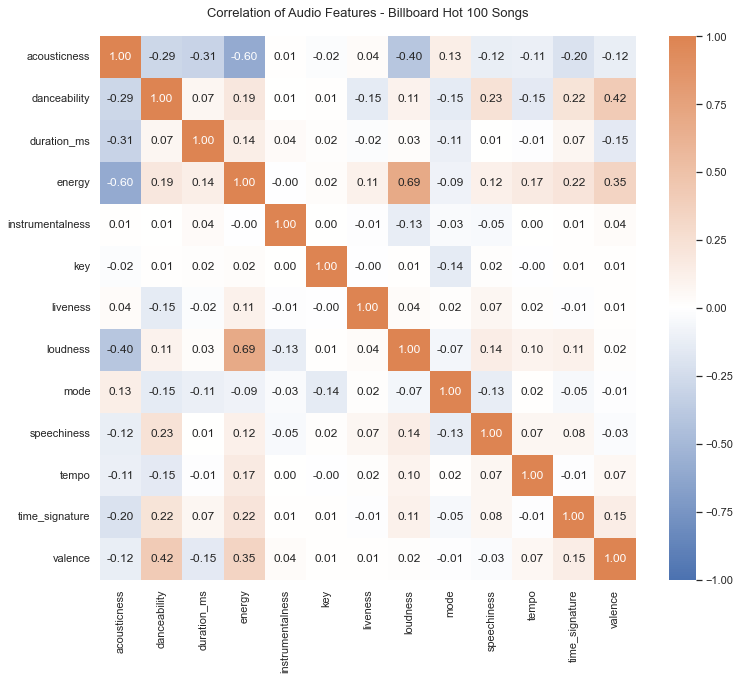

In [130]:
# correlation matrix - Billboard Hot 100
corr_B100 = df_B100_songs_AF.corr()

# plot
palette = sns.blend_palette([sns.color_palette()[0], '#ffffff', sns.color_palette()[1]], 3, as_cmap=True)
plt.subplots(figsize=(12, 10))
sns.heatmap(corr_B100, cmap=palette, center=0, vmin=-1, vmax=1, annot=True, fmt='.2f')
title='Correlation of Audio Features - Billboard Hot 100 Songs'
plt.title(title, fontsize=13, pad=20)

# save the image
plt.savefig(f'figures/correlation/{title}.png', facecolor='w', dpi=150, bbox_inches='tight')

plt.show()

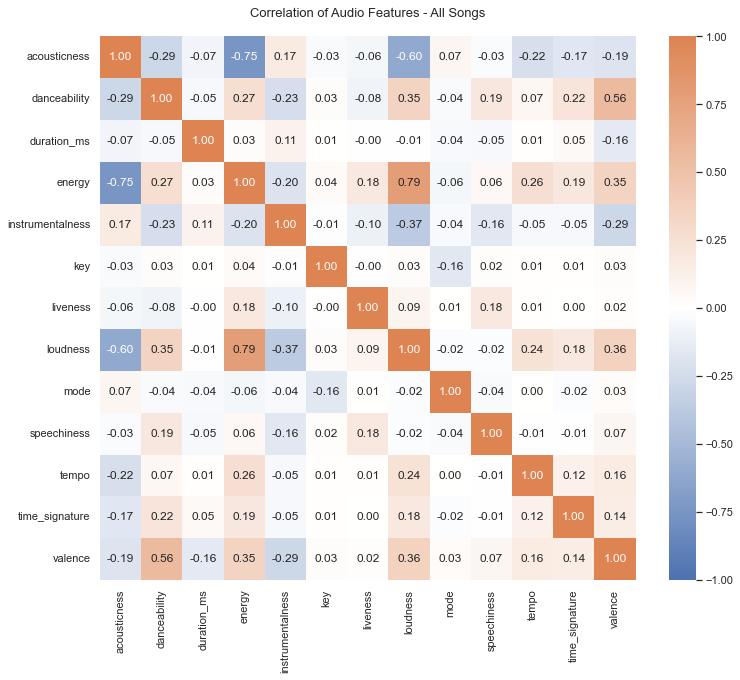

In [129]:
# correlation matrix - All Songs
corr_10M = df_10M.corr()

# plot
palette = sns.blend_palette([sns.color_palette()[0], '#ffffff', sns.color_palette()[1]], 3, as_cmap=True)
plt.subplots(figsize=(12, 10))
sns.heatmap(corr_10M, cmap=palette, center=0, vmin=-1, vmax=1, annot=True, fmt='.2f')
title='Correlation of Audio Features - All Songs'
plt.title(title, fontsize=13, pad=20)

# save the image
plt.savefig(f'figures/correlation/{title}.png', facecolor='w', dpi=150, bbox_inches='tight')

plt.show()

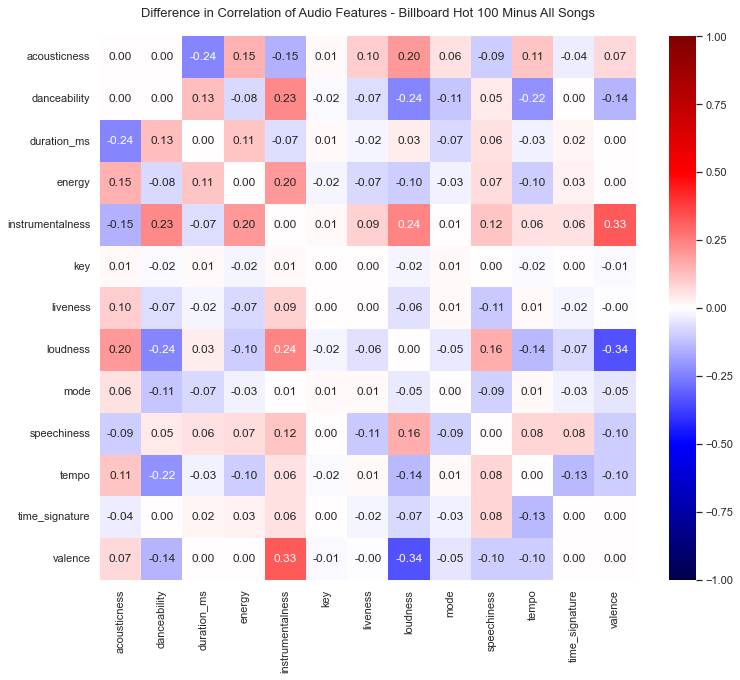

In [128]:
# differences between Billboard Hot 100 and All Songs
corr_diff = corr_B100 - corr_10M

# plot
palette = 'seismic'  # to differentiate from standard colour palette
plt.subplots(figsize=(12, 10))
sns.heatmap(corr_diff, cmap=palette, center=0, vmin=-1, vmax=1, annot=True, fmt='.2f')
title='Difference in Correlation of Audio Features - Billboard Hot 100 Minus All Songs'
plt.title(title, fontsize=13, pad=20)

# save the image
plt.savefig(f'figures/correlation/{title}.png', facecolor='w', dpi=150, bbox_inches='tight')

plt.show()

In [141]:
# Billboard 100 List - correlation with max weeks on board
df_B100_SORTED = df_B100.sort_values('weeks-on-board', ascending=False).drop_duplicates(subset=['song', 'artist']).drop(['date', 'id', 'rank', 'last-week'], axis=1).reset_index(drop=True)
df_B100_SORTED.head(10)

,song,artist,peak-rank,weeks-on-board,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,genre
0,Blinding Lights,The Weeknd,1,90,0.001,0.514,200040,0.730,0.000,1,0.090,-5.934,1,0.060,171.005,4,0.334,pop
1,Radioactive,Imagine Dragons,3,87,0.106,0.448,186813,0.784,0.000,9,0.668,-3.686,1,0.063,136.245,4,0.236,rock
2,Sail,AWOLNATION,17,79,0.441,0.826,259093,0.436,0.615,1,0.096,-9.583,1,0.056,119.051,4,0.272,rock
3,I'm Yours,Jason Mraz,6,76,0.957,0.549,219053,0.107,0.000,0,0.111,-16.147,1,0.084,74.630,4,0.307,choral
4,How Do I Live,LeAnn Rimes,2,69,0.128,0.577,266973,0.462,0.000,2,0.082,-7.989,1,0.028,128.303,4,0.258,dance pop
5,Counting Stars,OneRepublic,2,68,0.065,0.664,257839,0.705,0.000,1,0.115,-4.972,0,0.038,122.017,4,0.477,dance pop
6,Party Rock Anthem,LMFAO Featuring Lauren Bennett & GoonRock,1,68,NaN,NaN,<NA>,NaN,NaN,<NA>,NaN,NaN,<NA>,NaN,NaN,<NA>,NaN,None
7,Foolish Games/You Were Meant For Me,Jewel,2,65,NaN,NaN,<NA>,NaN,NaN,<NA>,NaN,NaN,<NA>,NaN,NaN,<NA>,NaN,None
8,Rolling In The Deep,Adele,1,65,0.138,0.730,228093,0.769,0.000,8,0.047,-5.114,1,0.030,104.948,4,0.507,pop
9,Before He Cheats,Carrie Underwood,8,64,0.271,0.519,199946,0.749,0.000,6,0.119,-3.318,0,0.041,147.905,4,0.290,pop


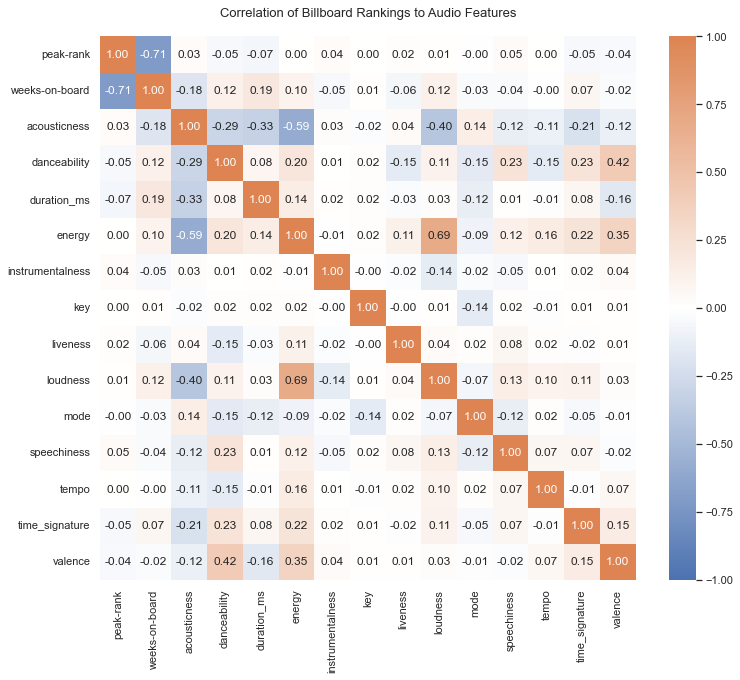

In [160]:
# correlation matrix - All Songs
corr_billboard_weeks = df_B100_SORTED.corr()

# plot
palette = sns.blend_palette([sns.color_palette()[0], '#ffffff', sns.color_palette()[1]], 3, as_cmap=True)
plt.subplots(figsize=(12, 10))
sns.heatmap(corr_billboard_weeks, cmap=palette, center=0, vmin=-1, vmax=1, annot=True, fmt='.2f')
title='Correlation of Billboard Rankings to Audio Features'
plt.title(title, fontsize=13, pad=20)

# save the image
plt.savefig(f'figures/correlation/{title}.png', facecolor='w', dpi=150, bbox_inches='tight')

plt.show()

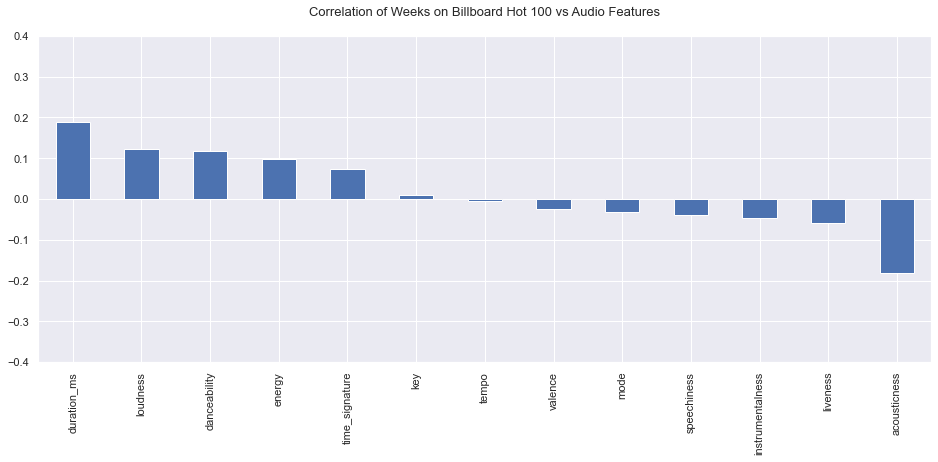

In [161]:
# correlated with weeks on board in Billboard Hot 100
corr_billboard_weeks['weeks-on-board'].sort_values(ascending=False)[1:-1].plot(kind='bar', figsize=(16,6))
title='Correlation of Weeks on Billboard Hot 100 vs Audio Features'
plt.title(title, fontsize=13, pad=20)
plt.ylim(-0.4, 0.4)

# save the image
plt.savefig(f'figures/correlation/{title}.png', facecolor='w', dpi=150, bbox_inches='tight')

plt.show()

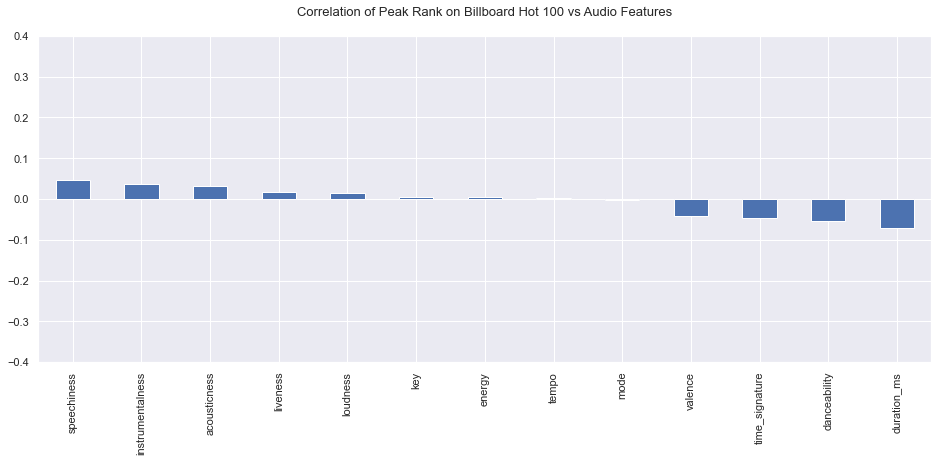

In [162]:
# correlated with peak rank in Billboard Hot 100
corr_billboard_weeks['peak-rank'].sort_values(ascending=False)[1:-1].plot(kind='bar', figsize=(16,6))
title='Correlation of Peak Rank on Billboard Hot 100 vs Audio Features'
plt.title(title, fontsize=13, pad=20)
plt.ylim(-0.4, 0.4)

# save the image
plt.savefig(f'figures/correlation/{title}.png', facecolor='w', dpi=150, bbox_inches='tight')

plt.show()

### Genres

In [74]:
df_genre_counts = pd.read_parquet('df_genre_counts.parquet')

In [78]:
# top 10 genres
df_genre_counts.head(10)

,count
genre_id,
classical,495467
classical performance,287065
adult standards,191882
rock,136731
early music,127095
orchestral performance,119693
vocal jazz,117062
orchestra,113422
classic rock,109292


In [83]:
# 10 random genres
list(df_genre_counts.sample(10).index)

['tajik pop',
 'suomisaundi',
 'traditional ska',
 'bass music',
 'math rock latinoamericano',
 'new tribe',
 'rap underground espanol',
 'abstractro',
 'kenyan pop',
 'russian chanson']

### Too Many Genres!!!

* genre_id seems more like a subgenre than an overarching genre
* it may be worth grouping these subgenres into broader genres

In [93]:
df_genre_counts.index.str.contains('pop').sum()

479

In [91]:
df_genre_counts[df_genre_counts.index.str.contains('pop') | df_genre_counts.index.str.contains('adult standards')].shape

(481, 1)

In [114]:
pop_words = ['pop', 'adult standards', 'contemporary']

def genre_contains(dataframe, list_of_words):
    criteria = []
    for word in list_of_words:
        criterion = dataframe.index.str.contains(word)
        criteria.append(criterion)

    return dataframe[pd.any(*criteria)].shape
    # this does not seem like a good way to do this........ can't figure out how to unpack
    
# genre_contains(df_genre_counts, pop_words)

In [111]:
len(df_genre_counts.index)

5489

In [117]:
pop_words = ['pop', 'adult standards', 'contemporary']
criteria = []
for word in pop_words:
    criterion = df_genre_counts.index.str.contains(word)
    criteria.append(criterion)

In [122]:
criteria.any()

AttributeError: 'list' object has no attribute 'any'